# Importing Library

In [2]:
# Numeric  Python: Thư viện về Đại số tuyến tính tính
import numpy as np
# Python  Analytic on Data System: Thư viện xử lý dữ liệu (for data processing) 
import pandas as pd
# Thư viện cung cấp các công cụ thống kê (statistics)
from scipy import stats
# Thư viện tiền xử lý DL (xử lý ngoại lệ: Isolated)
from sklearn import preprocessing
# Nạp hàm Thư viện phân tích dữ liệu thăm dò
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

## Importing dataset

In [3]:
# Đọc dữ liệu từ file csv
df59 = pd.read_csv('../G4_59BDNhan_UniversalBank.csv')
# Lấy hình dạng của dataset
df59.shape

(5000, 14)

## Kiểm tra dataset

In [4]:
# Lấy bảng dữ liệu mẫu
df59.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [3]:
# Mô tả dữ liệu thống kê
df59.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Loại bỏ cột không cần thiết

In [4]:
# Loại bỏ cột [ID] và [ZIP Code] vì không có giá trị trong chủ đề phân tích
df59 = df59.drop(['ID', 'ZIP Code'], axis=1)
df59.shape

(5000, 12)

## Kiểm tra NULL/NaN và giá trị âm

In [4]:
# Kiểm tra giá trị NULL/NaN
df59.isna().sum()

Age                  0
Experience           0
Income               0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

## Thay thế giá trị rỗng bằng phương pháp phổ biến

In [5]:
treated_df59 = df59.replace(np.nan, df59.mode().iloc[0])

In [7]:
treated_df59.isnull().sum()

Age                  0
Experience           0
Income               0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

## Tìm ma trận zscore --> tìm ra các giá trị biệt lệ (giá trị chệnh lệch quá xa so với phần còn lại)

In [6]:
z59 = np.abs(stats.zscore(treated_df59._get_numeric_data()))  #  Dò  tìm  và  lấy  các  giá  trị  cá  biệt  trong  tập dữ  liệu  gốc  thông  qua  điểm  z  (z_score)
print('MA  TRAN  Z-SCORE\n')
z59 #  in  ra  tập  (ma  trận)  các  giá  trị  z-score  từ  tập  dữ  liệu  gốc

MA  TRAN  Z-SCORE



,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1.774417,1.666078,0.538229,1.397414,0.193385,1.049078,0.555524,0.325875,2.928915,0.25354,1.216618,0.645314
1,0.029524,0.096330,0.864109,0.525991,0.250611,1.049078,0.555524,0.325875,2.928915,0.25354,1.216618,0.645314
2,0.552992,0.445163,1.363793,1.216855,0.536736,1.049078,0.555524,0.325875,0.341423,0.25354,1.216618,0.645314
3,0.901970,0.968413,0.569765,1.216855,0.436091,0.141703,0.555524,0.325875,0.341423,0.25354,1.216618,0.645314
4,0.901970,1.055621,0.625130,1.397414,0.536736,0.141703,0.555524,0.325875,0.341423,0.25354,1.216618,1.549632
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.425438,1.491662,0.733757,1.216855,0.021710,1.332484,0.555524,0.325875,0.341423,0.25354,0.821951,0.645314
4996,1.338194,1.404454,1.276892,1.397414,0.880087,1.049078,0.280238,0.325875,0.341423,0.25354,0.821951,0.645314
4997,1.540880,1.647835,1.081363,0.345432,0.937312,1.332484,0.555524,0.325875,0.341423,0.25354,1.216618,0.645314
4998,1.715370,1.735043,0.538229,0.525991,0.822862,0.141703,0.555524,0.325875,0.341423,0.25354,0.821951,0.645314


### *Vẽ biểu đồ Z-score để tìm khoảng tụ

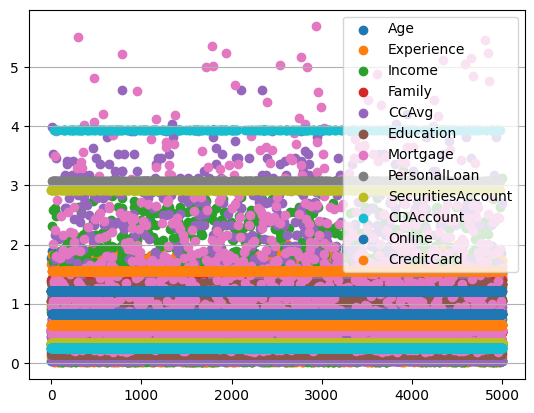

In [7]:
cols = z59.columns.to_list()

# Vẽ biểu đồ cho từng cột
for col in cols:
    data = z59[col].reset_index()
    plt.scatter(data['index'], data[col])

plt.legend(cols)
plt.grid(axis='y')
plt.show()

- Ta có thể thấy, khoảng tụ của Z-score tập trung từ 3.5 trở xuống, từ 3.5 trở lên thì giá trị dần rải rác  
--> Nên ta có thể chọn 3.5 làm mức ngưỡng

In [8]:
# Loại bỏ các giá trị biệt lập
z_df59 = df59[(z59<3.5).all(axis=1)]
df59 = z_df59
# df59 = df59.reset_index().drop(columns=['index'])
df59

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


## Chuẩn hóa (Rời rạc hóa) tập dữ liệu Input dùng ..MaxMin

In [9]:

scaler = preprocessing.MinMaxScaler()
df59_num = z_df59._get_numeric_data()
scaler.fit(df59_num) # xác định thang đo MaxMin cho dataframe
df59_chrr = pd.DataFrame(scaler.transform(df59_num),  index=df59_num.index,  columns=df59_num.columns) 
df59 = df59_chrr
df59

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,0.045455,0.086957,0.195238,1.000000,0.2000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0
1,0.500000,0.478261,0.123810,0.666667,0.1875,0.0,0.000000,0.0,1.0,0.0,0.0,0.0
2,0.363636,0.391304,0.014286,0.000000,0.1250,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.272727,0.260870,0.438095,0.000000,0.3375,0.5,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.272727,0.239130,0.176190,1.000000,0.1250,0.5,0.000000,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.136364,0.130435,0.152381,0.000000,0.2375,1.0,0.000000,0.0,0.0,0.0,1.0,0.0
4996,0.159091,0.152174,0.033333,1.000000,0.0500,0.0,0.206311,0.0,0.0,0.0,1.0,0.0
4997,0.909091,0.913043,0.076190,0.333333,0.0375,1.0,0.000000,0.0,0.0,0.0,0.0,0.0
4998,0.954545,0.934783,0.195238,0.666667,0.0625,0.5,0.000000,0.0,0.0,0.0,1.0,0.0


 ## Xác định mô hình trích lọc các thuộc tính đặc trưng bằng PP: Chi2

### Vẽ biểu đồ biến thiên của các thuộc tính

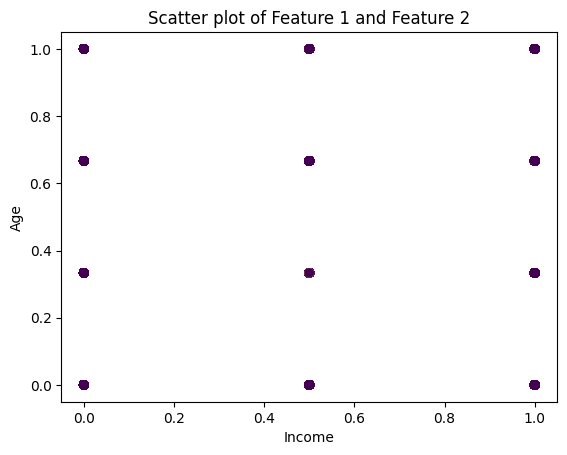

In [10]:
# X là tập các thuộc tính đặc trưng, y là thuộc tính đầu ra
X = df59.drop(columns='PersonalLoan')
y = df59['PersonalLoan']

# Tạo scatter plot
plt.scatter(X['Education'], X['Family'], c=y)

# Đặt tên trục và tiêu đề
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Scatter plot of Feature 1 and Feature 2')

# Hiển thị biểu đồ
plt.show()

In [11]:
X = df59.loc[:, df59.columns != 'PersonalLoan']
y = df59[['PersonalLoan']]

selector = SelectKBest(chi2, k=3)
selector.fit(X, y)
X_new = selector.transform(X)
X_new


array([[0.1952381 , 0.2       , 0.        ],
       [0.12380952, 0.1875    , 0.        ],
       [0.01428571, 0.125     , 0.        ],
       ...,
       [0.07619048, 0.0375    , 1.        ],
       [0.1952381 , 0.0625    , 0.5       ],
       [0.35714286, 0.1       , 0.        ]])

In [12]:
XX = X.columns[selector.get_support(indices=True)].to_list()
XX 

['Income', 'CCAvg', 'Education']

## Xác định mô hình trích lọc các thuộc tính đặc trưng bằng PP: Correlation

In [13]:
# Tính toán giá trị tương quan cho tập dữ liệu
cor = df59.corr()

# Chọn thuộc tính output cho mô hình
cor_target = abs(cor["PersonalLoan"])

# lọc chỉ số tương quan
relevant_features = cor_target[(cor_target>0.02) & (cor_target < 1)]

# Xuất kết quả
print(f'Original feature number: {df59.shape[1]}')
print(f'The number of relevant features: {len(relevant_features)}\n')
relevant_features.sort_values()

Original feature number: 12
The number of relevant features: 8



Online               0.044501
SecuritiesAccount    0.050535
Family               0.051466
Mortgage             0.056149
CreditCard           0.072079
Education            0.124048
CCAvg                0.311742
Income               0.441634
Name: PersonalLoan, dtype: float64

+ Ta có thể thấy 3 thuộc tính cuối Education, CCAvg, Income có chỉ số tương quan lớn nhất  
--> Suy ra chúng ảnh hướng tới mục tiêu nhiều nhất nên chúng là các thuộc tính đặc trưng

### *Vẽ biểu đồ trực quan mức độ tương quan

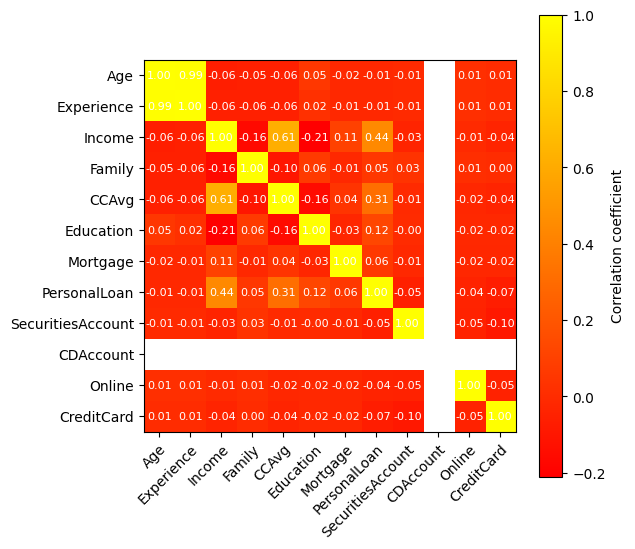

In [14]:
cols = df59.columns.to_list()

# Vẽ biểu đồ cho từng cột
cor = df59.corr()
fig, ax = plt.subplots(figsize=(6,6))
heatmap = ax.imshow(cor, cmap='autumn', interpolation='nearest')
for i in range(len(cols)):
    for j in range(len(cols)):
        ax.text(j, i, "{:.2f}".format(cor.iloc[i, j]), ha="center", va="center", color="white", fontsize=8)
ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, rotation=45, ha="right", rotation_mode="anchor", fontsize=10)
ax.set_yticks(range(len(cols)))
ax.set_yticklabels(cols, fontsize=10)

# Add colorbar
cbar = fig.colorbar(heatmap, ax=ax)
cbar.set_label('Correlation coefficient')

plt.show()

+ Quan sát trong hình, thuộc tính CDAccount luôn bằng 0 ở mọi dòng nên nó chắc chắn không có sự tương quan với những thuộc tính khác  
--> Nên CDAccount bị rỗng trong hình  
+ Trong thuộc tính PersonalLoan, là thuộc tính đầu ra cần dự đoán, có giá trị cao nhất lần lượt là Income (0.44), CCAvg (0.31), Education (0.12)  
--> Nên ta kết luận rằng, 3 thuộc tính trên là thuộc tính đặc trưng

## Xác định mô hình dự đoán

In [15]:
new_df59 = df59[['Income', 'CCAvg', 'Education', 'PersonalLoan']]
new_df59

,Income,CCAvg,Education,PersonalLoan
0,0.195238,0.2000,0.0,0.0
1,0.123810,0.1875,0.0,0.0
2,0.014286,0.1250,0.0,0.0
3,0.438095,0.3375,0.5,0.0
4,0.176190,0.1250,0.5,0.0
...,...,...,...,...
4995,0.152381,0.2375,1.0,0.0
4996,0.033333,0.0500,0.0,0.0
4997,0.076190,0.0375,1.0,0.0
4998,0.195238,0.0625,0.5,0.0


### *Tỉ lệ chuyển đổi thành công

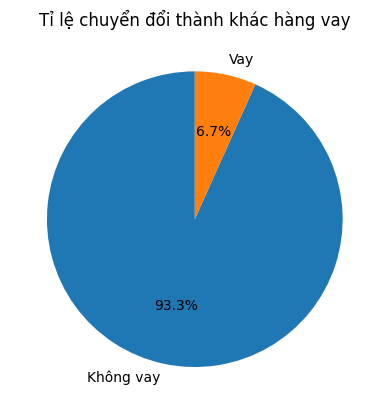

In [16]:
data = new_df59.groupby('PersonalLoan')['PersonalLoan'].count()

# Tạo mảng chứa nhãn cho các phần tử trong biểu đồ tròn
labels = ['Không vay', 'Vay']

# Tạo biểu đồ tròn
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)

# Thêm tiêu đề cho biểu đồ
plt.title('Tỉ lệ chuyển đổi thành khác hàng vay')

# Hiển thị biểu đồ
plt.show()

## Áp dụng mô hình học máy Decision Tree để đưa ra dự đoán và tỉ lệ chính xác của dự đoán

In [17]:
# Tách tập huấn luyện và tập kiểm tra
X = new_df59.drop('PersonalLoan', axis=1)
y = new_df59['PersonalLoan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Đánh giá độ chính xác trên tập kiểm tra
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Độ chính xác trên tập kiểm tra: {:.2f}'.format(accuracy))

Độ chính xác trên tập kiểm tra: 0.97


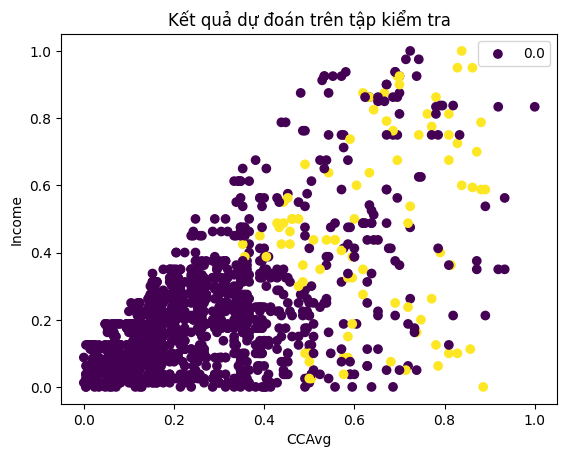

In [18]:
# Trực quan kết quả dự đoán trên tập kiểm tra
plt.scatter(X_test['Income'], X_test['CCAvg'], c=y_pred)
plt.xlabel('CCAvg')
plt.ylabel('Income')
plt.legend(y_pred)
plt.title('Kết quả dự đoán trên tập kiểm tra')
plt.show()